In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sys import argv
from logreg_train import logreg

In [145]:
df = pd.read_csv("../datasets/dataset_train.csv", index_col = "Index")

In [146]:
df

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47


In [147]:
df_bis = df.drop(['First Name', 'Last Name', "Birthday", "Best Hand"], axis=1, inplace=False)


In [148]:
df_bis.drop("Astronomy", axis=1, inplace=True)
df_bis.drop("Arithmancy", axis=1, inplace=True)
df_bis.drop("Care of Magical Creatures", axis=1, inplace=True)

In [149]:
df_bis

,Hogwarts House,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
Index,,,,,,,,,,,
0,Ravenclaw,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89
1,Slytherin,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45
2,Ravenclaw,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42
3,Gryffindor,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64
4,Gryffindor,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83
1596,Slytherin,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80
1597,Gryffindor,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47


In [150]:
def describe(df):
    """
    Program that describe a dataset.
    """
    dfNum = df.select_dtypes(include=['int64','float64'])
    stats = pd.DataFrame(columns=dfNum.columns)
    col_name=stats.columns
    for i in range (len(stats.columns)):
        col = df.loc[:, col_name[i]]
        col_allNum = df.loc[~col.isna(), col_name[i]]
        count = len(col_allNum)
        mean = sum(col_allNum) / len(col_allNum)
        var =  sum([(x - mean)**2 for x in col_allNum])/count
        std = var**(0.5)
        stats.loc['Mean', col_name[i]] = mean
        stats.loc['Std', col_name[i]] = std
    return stats

In [151]:
stats = describe(df_bis)


In [152]:
stats

,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
Mean,1.14102,-0.387863,3.15391,-224.589915,495.74797,2.963095,1030.096946,5.950373,-243.374409,21.958012
Std,5.218016,5.211132,4.15397,486.189433,106.251202,4.424353,44.111025,3.146852,8.780895,97.601087


In [153]:
def normalize_value(df):
    dfNum = df.select_dtypes(include=['int64','float64'])
    stats = describe(dfNum)
    dfN = df.copy()
    for i in range(len(dfNum.columns)):
        mean = stats.loc["Mean", dfNum.columns[i]]
        std = stats.loc["Std", dfNum.columns[i]]
        dfN.loc[:, dfNum.columns[i]] = (dfN.loc[:, dfNum.columns[i]] - mean) / std
    return dfN

In [154]:
df_Normilised = normalize_value(df_bis)

In [155]:
df_Normilised

,Hogwarts House,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
Index,,,,,,,,,,,
0,Ravenclaw,0.878909,1.010668,0.377492,1.021466,0.345749,0.512609,0.219703,-0.686402,1.204930,-0.500486
1,Slytherin,-1.366126,1.133817,-2.110249,-0.540429,-1.204576,0.258586,0.653978,0.412593,-1.003297,-1.387362
2,Ravenclaw,1.261782,0.776918,0.718852,1.829500,1.005516,0.133914,1.314669,0.882837,1.825755,0.086700
3,Gryffindor,-1.463820,-1.264517,0.209941,-0.642571,0.265730,-1.756806,-2.487031,-1.629712,-1.534279,1.830738
4,Gryffindor,-1.717442,NaN,-0.220972,-0.451825,0.974827,-1.448228,-2.100659,-0.520936,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,-1.089084,-0.605423,0.613411,-0.560780,1.152667,-1.852207,-1.493438,-0.813920,-0.799418,1.678998
1596,Slytherin,0.942896,-0.630851,-0.336283,-0.861148,-0.469834,-0.163862,0.590565,-0.039757,-0.347662,0.234034
1597,Gryffindor,-0.832556,-0.969526,0.700797,-0.330243,1.312583,-2.022296,-1.728145,-1.347558,-0.940950,1.808504


In [156]:
df_Normilised

,Hogwarts House,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
Index,,,,,,,,,,,
0,Ravenclaw,0.878909,1.010668,0.377492,1.021466,0.345749,0.512609,0.219703,-0.686402,1.204930,-0.500486
1,Slytherin,-1.366126,1.133817,-2.110249,-0.540429,-1.204576,0.258586,0.653978,0.412593,-1.003297,-1.387362
2,Ravenclaw,1.261782,0.776918,0.718852,1.829500,1.005516,0.133914,1.314669,0.882837,1.825755,0.086700
3,Gryffindor,-1.463820,-1.264517,0.209941,-0.642571,0.265730,-1.756806,-2.487031,-1.629712,-1.534279,1.830738
4,Gryffindor,-1.717442,NaN,-0.220972,-0.451825,0.974827,-1.448228,-2.100659,-0.520936,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,-1.089084,-0.605423,0.613411,-0.560780,1.152667,-1.852207,-1.493438,-0.813920,-0.799418,1.678998
1596,Slytherin,0.942896,-0.630851,-0.336283,-0.861148,-0.469834,-0.163862,0.590565,-0.039757,-0.347662,0.234034
1597,Gryffindor,-0.832556,-0.969526,0.700797,-0.330243,1.312583,-2.022296,-1.728145,-1.347558,-0.940950,1.808504


In [157]:
for i in range(len(df_Normilised.columns)):
    df_Normilised = df_Normilised.loc[~df_Normilised.isna()[df_Normilised.columns[i]], :]

# On ajoute les test
slytherin_df = df_Normilised.copy()
slytherin_df.loc[:, "Test Slytherin"] = 0
slytherin_df.loc[df_Normilised.loc[:,"Hogwarts House"] == "Slytherin", "Test Slytherin"] = 1

ravenclaw_df= df_Normilised.copy()
ravenclaw_df.loc[:, "Test Ravenclaw"] = 0
ravenclaw_df.loc[df_Normilised.loc[:,"Hogwarts House"] == "Ravenclaw", "Test Ravenclaw"] = 1

gryffindor_df= df_Normilised.copy()
gryffindor_df.loc[:, "Test Gryffindor"] = 0
gryffindor_df.loc[df_Normilised.loc[:,"Hogwarts House"] == "Gryffindor", "Test Gryffindor"] = 1
hufflepuff_df= df_Normilised.copy()
hufflepuff_df.loc[:, "Test Hufflepuff"] = 0
hufflepuff_df.loc[df_Normilised.loc[:,"Hogwarts House"] == "Hufflepuff", "Test Hufflepuff"] = 1
slytherin_df.drop("Hogwarts House", axis=1, inplace=True)
ravenclaw_df.drop("Hogwarts House", axis=1, inplace=True)
gryffindor_df.drop("Hogwarts House", axis=1, inplace=True)
hufflepuff_df.drop("Hogwarts House", axis=1, inplace=True)

X = slytherin_df.iloc[:, :len(slytherin_df.columns)-1]
y = np.array([slytherin_df.iloc[:, len(slytherin_df.columns)-1:].to_numpy()[:, 0],
        ravenclaw_df.iloc[:, len(ravenclaw_df.columns)-1:].to_numpy()[:, 0],
        gryffindor_df.iloc[:, len(gryffindor_df.columns)-1:].to_numpy()[:, 0],
        hufflepuff_df.iloc[:, len(hufflepuff_df.columns)-1:].to_numpy()[:, 0]])

In [158]:
alpha = 0.1
lambda_ = 0.1
nb_iterations = 200

In [159]:
X


,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
Index,,,,,,,,,,
0,0.878909,1.010668,0.377492,1.021466,0.345749,0.512609,0.219703,-0.686402,1.204930,-0.500486
1,-1.366126,1.133817,-2.110249,-0.540429,-1.204576,0.258586,0.653978,0.412593,-1.003297,-1.387362
2,1.261782,0.776918,0.718852,1.829500,1.005516,0.133914,1.314669,0.882837,1.825755,0.086700
3,-1.463820,-1.264517,0.209941,-0.642571,0.265730,-1.756806,-2.487031,-1.629712,-1.534279,1.830738
5,-1.040667,1.252076,-2.346168,-0.445110,-0.936894,0.546338,0.515704,1.843379,-0.520571,-0.580403
...,...,...,...,...,...,...,...,...,...,...
1595,-1.089084,-0.605423,0.613411,-0.560780,1.152667,-1.852207,-1.493438,-0.813920,-0.799418,1.678998
1596,0.942896,-0.630851,-0.336283,-0.861148,-0.469834,-0.163862,0.590565,-0.039757,-0.347662,0.234034
1597,-0.832556,-0.969526,0.700797,-0.330243,1.312583,-2.022296,-1.728145,-1.347558,-0.940950,1.808504


In [160]:
# def updateWb(X, y, w, b, lambda_, alpha):


In [161]:
def updateWb(X, y, w, b, lambda_, alpha):
    n = len(X)
    m = 1
    dj_dw = np.array([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)])
    dj_db = np.zeros(4)
    y_slytherin, y_ravenclaw, y_gryffindor, y_hufflepuff = y
    w_slytherin, w_ravenclaw, w_gryffindor, w_hufflepuff = w
    b_slytherin, b_ravenclaw, b_gryffindor, b_hufflepuff = b
    z_slytherin = np.dot(X, w_slytherin) + b_slytherin
    f_wb_i_slytherin = 1 / (1 + np.exp(-z_slytherin))
    err_i_slytherin  = f_wb_i_slytherin  - y_slytherin

    z_ravenclaw = np.dot(X, w_ravenclaw) + b_ravenclaw
    f_wb_i_ravenclaw = 1 / (1 + np.exp(-z_ravenclaw))
    err_i_ravenclaw  = f_wb_i_ravenclaw  - y_ravenclaw

    z_gryffindor = np.dot(X, w_gryffindor) + b_gryffindor
    f_wb_i_gryffindor = 1 / (1 + np.exp(-z_gryffindor))
    err_i_gryffindor  = f_wb_i_gryffindor  - y_gryffindor

    z_hufflepuff = np.dot(X, w_hufflepuff) + b_hufflepuff
    f_wb_i_hufflepuff = 1 / (1 + np.exp(-z_hufflepuff))
    err_i_hufflepuff = f_wb_i_hufflepuff  - y_hufflepuff
    for j in range(n):
        dj_dw[0][j] = dj_dw[0][j] + err_i_slytherin * X[j]
        dj_dw[1][j] = dj_dw[1][j] + err_i_ravenclaw * X[j]
        dj_dw[2][j] = dj_dw[2][j] + err_i_gryffindor * X[j]
        dj_dw[3][j] = dj_dw[3][j] + err_i_hufflepuff * X[j]
        dj_db[0] = dj_db[0] + err_i_slytherin
        dj_db[1] = dj_db[1] + err_i_ravenclaw
        dj_db[2] = dj_db[2] + err_i_gryffindor
        dj_db[3] = dj_db[3] + err_i_hufflepuff
    dj_dw =  dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[0][j] = dj_dw[0][j] + (lambda_/m) * w_slytherin[j]
        dj_dw[1][j] = dj_dw[1][j] + (lambda_/m) * w_ravenclaw[j]
        dj_dw[2][j] = dj_dw[2][j] + (lambda_/m) * w_gryffindor[j]
        dj_dw[3][j] = dj_dw[3][j] + (lambda_/m) * w_hufflepuff[j]

    W_updated = w - alpha * dj_dw
    b_updated = b - alpha * dj_db
    return (W_updated, b_updated)

In [162]:

def computeCost(X, y, w, b, lambda_ = 1):
    """
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters
    b (scalar)      : model parameter
    lambda_ (scalar): Controls amount of regularization
    Returns:
        cost (scalar):  cost
    """
    n = len(X)
    y_slytherin, y_ravenclaw, y_gryffindor, y_hufflepuff = y
    w_slytherin, w_ravenclaw, w_gryffindor, w_hufflepuff = w
    b_slytherin, b_ravenclaw, b_gryffindor, b_hufflepuff = b
    cost_slytherin = 0
    cost_ravenclaw = 0
    cost_gryffindor = 0
    cost_hufflepuff = 0
    z_slytherin = np.dot(w_slytherin, X) + b_slytherin
    f_wb_slytherin = 1 / (1 + np.exp(-z_slytherin))
    cost_slytherin += -y_slytherin * np.log(f_wb_slytherin) - (1 - y_slytherin)*np.log(1-f_wb_slytherin)

    z_ravenclaw = np.dot(w_ravenclaw, X) + b_ravenclaw
    f_wb_ravenclaw = 1 / (1 + np.exp(-z_ravenclaw))
    cost_ravenclaw += -y_ravenclaw * np.log(f_wb_ravenclaw) - (1 - y_ravenclaw)*np.log(1-f_wb_ravenclaw)

    z_gryffindor = np.dot(w_gryffindor, X) + b_gryffindor
    f_wb_gryffindor = 1 / (1 + np.exp(-z_gryffindor))
    cost_gryffindor += -y_gryffindor * np.log(f_wb_gryffindor) - (1 - y_gryffindor)*np.log(1-f_wb_gryffindor)

    z_hufflepuff = np.dot(w_hufflepuff, X) + b_hufflepuff
    f_wb_hufflepuff = 1 / (1 + np.exp(-z_hufflepuff))
    cost_hufflepuff += -y_hufflepuff * np.log(f_wb_hufflepuff) - (1 - y_hufflepuff)*np.log(1-f_wb_hufflepuff)

    reg_part_slytherin = 0
    reg_part_ravenclaw = 0
    reg_part_gryffindor = 0
    reg_part_hufflepuff = 0

    for i in range(n):
        reg_part_slytherin += w_slytherin[i]**2
        reg_part_ravenclaw += w_ravenclaw[i]**2
        reg_part_gryffindor += w_gryffindor[i]**2
        reg_part_hufflepuff += w_hufflepuff[i]**2

    cost_slytherin = cost_slytherin + (lambda_ / (2*m)) * reg_part_slytherin
    cost_ravenclaw = cost_ravenclaw + (lambda_ / (2*m)) * reg_part_ravenclaw
    cost_gryffindor = cost_gryffindor + (lambda_ / (2*m)) * reg_part_gryffindor
    cost_hufflepuff = cost_hufflepuff + (lambda_ / (2*m)) * reg_part_hufflepuff

    return (cost_slytherin, cost_ravenclaw, cost_gryffindor, cost_hufflepuff)


In [163]:
m, n = X.shape
w = np.array([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)])
b = np.zeros(4)
result = np.array([np.zeros(nb_iterations), np.zeros(nb_iterations), np.zeros(nb_iterations), np.zeros(nb_iterations)])
k = 0



In [164]:

for i in tqdm(range(nb_iterations)):
    y_to_use = np.array([y[0][k], y[1][k], y[2][k], y[3][k]])
    random_index = np.random.choice(m)
    X_i = X.iloc[random_index, :].values
    y_i = np.array([y[0][random_index], y[1][random_index], y[2][random_index], y[3][random_index]])
    w, b = updateWb(X_i, y_i, w, b, lambda_, alpha)
    result[0][k],result[1][k], result[2][k], result[3][k] = (computeCost(X_i, y_i, w, b, lambda_))
    k += 1

100%|██████████| 200/200 [00:00<00:00, 10455.18it/s]


In [165]:
result

array([[0.34146593, 0.20811384, 0.63853351, 0.40658329, 0.34150742,
        0.20533634, 0.16078453, 0.23575226, 0.18984   , 0.11866821,
        0.10102968, 0.17174292, 0.11094047, 0.2315636 , 0.10133739,
        0.08615085, 0.14590831, 0.09418016, 0.12841826, 0.06976819,
        0.04343787, 0.15657785, 0.03439861, 0.14676339, 0.04729744,
        0.04537983, 0.02829961, 0.07927231, 0.04957854, 0.08318314,
        0.03875425, 0.2955616 , 0.08941836, 0.0448536 , 0.04028261,
        0.0257451 , 0.06714529, 0.03610369, 0.06966892, 0.10405409,
        0.14611088, 0.02785319, 0.01280084, 0.04012455, 0.27097188,
        0.11734557, 0.06058943, 0.03725297, 0.04050719, 0.0605097 ,
        0.06838306, 0.0983328 , 0.04861724, 0.15397497, 0.02712452,
        0.00793752, 0.0915396 , 0.12758265, 0.0878672 , 0.1062664 ,
        0.02103635, 0.14038866, 0.01070133, 0.02520327, 0.04712228,
        0.04054066, 0.02399678, 0.03956595, 0.03898875, 0.24140547,
        0.12920696, 0.03046394, 0.09121655, 0.05

In [166]:
def plot_algo_convergence(data_to_plot_slytherin, data_to_plot_ravenclaw, data_to_plot_gryffindor, data_to_plot_hufflepuff):
    plt.figure(figsize=(13, 13))
    plt.subplot(2, 2, 1)
    nb_plot_slytherin = len(data_to_plot_slytherin)
    x_slytherin = range(len(data_to_plot_slytherin[0][1]))
    for i in range(nb_plot_slytherin):
        plt.plot(x_slytherin, data_to_plot_slytherin[i][1], label = data_to_plot_slytherin[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Slytherin : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 2)
    nb_plot_ravenclaw = len(data_to_plot_ravenclaw)
    x_ravenclaw = range(len(data_to_plot_ravenclaw[0][1]))
    for i in range(nb_plot_ravenclaw):
        plt.plot(x_ravenclaw, data_to_plot_ravenclaw[i][1], label = data_to_plot_ravenclaw[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Ravenclaw : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 3)
    nb_plot_gryffindor = len(data_to_plot_gryffindor)
    x_gryffindor = range(len(data_to_plot_gryffindor[0][1]))
    for i in range(nb_plot_gryffindor):
        plt.plot(x_gryffindor, data_to_plot_gryffindor[i][1], label = data_to_plot_gryffindor[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Gryffindor : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 4)
    nb_plot_hufflepuff = len(data_to_plot_hufflepuff)
    x_hufflepuff = range(len(data_to_plot_hufflepuff[0][1]))
    for i in range(nb_plot_hufflepuff):
        plt.plot(x_hufflepuff, data_to_plot_hufflepuff[i][1], label = data_to_plot_hufflepuff[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Hufflepuff : Cost vs gradient descent iteration")
    plt.legend()

    plt.show()

In [167]:
params = stats.copy()
params.loc["Slytherin", :] = w[0]
params.loc["Ravenclaw", :] = w[1]
params.loc["Gryffindor", :] = w[2]
params.loc["Hufflepuff", :] = w[3]
params.loc["Slytherin", "b"] = b[0]
params.loc["Ravenclaw", "b"] = b[1]
params.loc["Gryffindor", "b"] = b[2]
params.loc["Hufflepuff", "b"] = b[3]
params.to_csv("paramsStochaostic.csv", index=True)

In [168]:
w1, b1, result1 = logreg(df_Normilised, alpha, lambda_, 200)


100%|██████████| 200/200 [01:56<00:00,  1.72it/s]


In [173]:
saved_result = []
saved_result.append(["Batch ", result1[0], result1[1], result1[2], result1[3]])
saved_result.append(["Stochaostic gradient descent ", result[0], result[1], result[2], result[3]])
data_to_plot_slytherin = []
data_to_plot_ravenclaw = []
data_to_plot_gryffindor = []
data_to_plot_hufflepuff = []
for i in range(len(saved_result)):
    data_to_plot_slytherin.append([saved_result[i][0] + " Slytherin", saved_result[i][1]])
    data_to_plot_ravenclaw.append([saved_result[i][0] + " Ravenclaw", saved_result[i][2]])
    data_to_plot_gryffindor.append([saved_result[i][0] + " Gryffindor", saved_result[i][3]])
    data_to_plot_hufflepuff.append([saved_result[i][0] + " Hufflepuff",saved_result[i][4]])


In [174]:
result

array([[0.34146593, 0.20811384, 0.63853351, 0.40658329, 0.34150742,
        0.20533634, 0.16078453, 0.23575226, 0.18984   , 0.11866821,
        0.10102968, 0.17174292, 0.11094047, 0.2315636 , 0.10133739,
        0.08615085, 0.14590831, 0.09418016, 0.12841826, 0.06976819,
        0.04343787, 0.15657785, 0.03439861, 0.14676339, 0.04729744,
        0.04537983, 0.02829961, 0.07927231, 0.04957854, 0.08318314,
        0.03875425, 0.2955616 , 0.08941836, 0.0448536 , 0.04028261,
        0.0257451 , 0.06714529, 0.03610369, 0.06966892, 0.10405409,
        0.14611088, 0.02785319, 0.01280084, 0.04012455, 0.27097188,
        0.11734557, 0.06058943, 0.03725297, 0.04050719, 0.0605097 ,
        0.06838306, 0.0983328 , 0.04861724, 0.15397497, 0.02712452,
        0.00793752, 0.0915396 , 0.12758265, 0.0878672 , 0.1062664 ,
        0.02103635, 0.14038866, 0.01070133, 0.02520327, 0.04712228,
        0.04054066, 0.02399678, 0.03956595, 0.03898875, 0.24140547,
        0.12920696, 0.03046394, 0.09121655, 0.05

In [175]:
result1

array([[0.64896704, 0.60988369, 0.57516985, 0.54419283, 0.51641379,
        0.49137948, 0.46871094, 0.44809181, 0.42925756, 0.41198631,
        0.39609107, 0.38141342, 0.36781843, 0.3551905 , 0.34343007,
        0.33245089, 0.32217793, 0.31254552, 0.30349598, 0.29497841,
        0.2869477 , 0.27936373, 0.27219071, 0.26539655, 0.25895245,
        0.25283245, 0.24701309, 0.24147312, 0.23619325, 0.2311559 ,
        0.22634505, 0.22174605, 0.21734546, 0.21313098, 0.20909126,
        0.20521589, 0.20149522, 0.19792037, 0.19448309, 0.19117577,
        0.18799131, 0.18492314, 0.18196512, 0.17911156, 0.17635713,
        0.17369685, 0.17112608, 0.16864047, 0.16623595, 0.16390868,
        0.16165508, 0.15947177, 0.15735559, 0.15530355, 0.15331282,
        0.15138077, 0.14950489, 0.1476828 , 0.14591227, 0.1441912 ,
        0.14251757, 0.14088949, 0.13930516, 0.13776287, 0.13626101,
        0.13479804, 0.1333725 , 0.13198298, 0.13062819, 0.12930684,
        0.12801775, 0.12675976, 0.12553179, 0.12

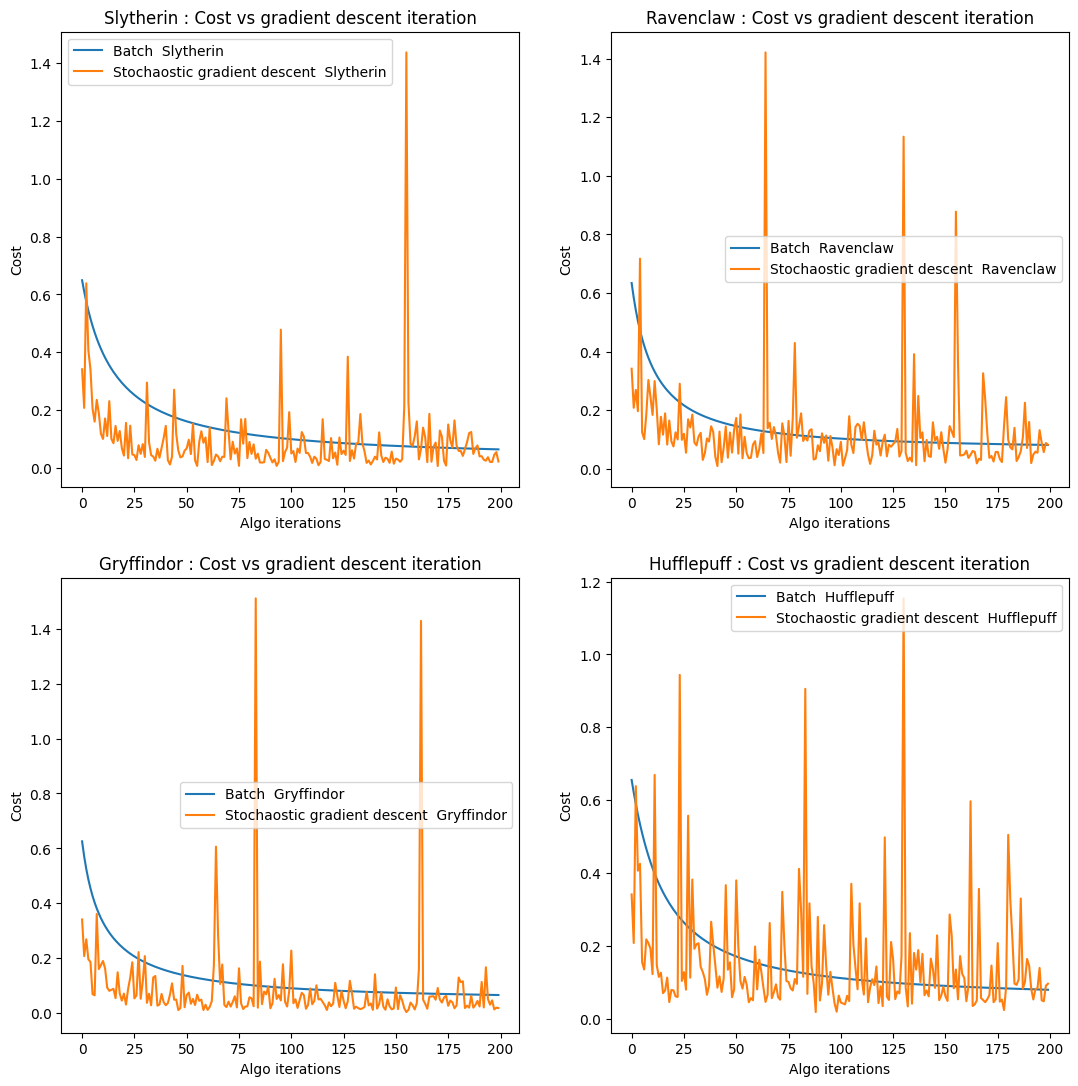

In [176]:
plot_algo_convergence(data_to_plot_slytherin, data_to_plot_ravenclaw, data_to_plot_gryffindor, data_to_plot_hufflepuff)